Experimental for checking the value of the LGI, OMIT and GREEN

Stuff

In [16]:
## Import Dependencies
import numpy as np
import mediapipe as mp
import pandas as pd
import cv2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import scipy
import os
import neurokit2 as nk


In [17]:
## Experimental for checking the value of the LGI, OMIT and GREEN

## Open the file .npy for the LGI, OMIT and GREEN for subject S51
# Load the data

## Plot the path of the methods
pos_path = os.path.join("s51", f"s51_T1_POS_rppg.npy")
lgi_path = os.path.join("s51", f"s51_T1_LGI_rppg.npy")
omit_path = os.path.join("s51", f"s51_T1_OMIT_rppg.npy")
green_path = os.path.join("s51", f"s51_T1_GREEN_rppg.npy")
chrom_path = os.path.join("s51", f"s51_T1_CHROM_rppg.npy")

lgi = np.load(lgi_path)
omit = np.load(omit_path)
green = np.load(green_path)
chrom = np.load(chrom_path)
pos = np.load(pos_path)

## Checking the random value of the LGI, OMIT and GREEN are the same
print("LGI: ", lgi[100])
print("OMIT: ", omit[100])
print("GREEN: ", green[100])
print("CHROM: ", chrom[100])
print("POS: ", pos[100])

## Do the same for the 500th value
print("==================================")
print("LGI: ", lgi[700])
print("OMIT: ", omit[700])
print("GREEN: ", green[700])
print("CHROM: ", chrom[700])
print("POS: ", pos[700])

## Do the same for the 1000th value
print("==================================")
print("LGI: ", lgi[1000])
print("OMIT: ", omit[1000])
print("GREEN: ", green[1000])
print("CHROM: ", chrom[1000])
print("POS: ", pos[1000])

## Do the same for the 1500th value
print("==================================")
print("LGI: ", lgi[1500])
print("OMIT: ", omit[1500])
print("GREEN: ", green[1500])
print("CHROM: ", chrom[1500])
print("POS: ", pos[1500])

## Do the same for the 2000th value
print("==================================")
print("LGI: ", lgi[2000])
print("OMIT: ", omit[2000])
print("GREEN: ", green[2000])
print("CHROM: ", chrom[2000])
print("POS: ", pos[2000])

LGI:  -0.09834863291048775
OMIT:  -0.07139071716441997
GREEN:  120.52907873924617
CHROM:  0.002476581995133946
POS:  -0.0944350325839833
LGI:  -0.021729987317221425
OMIT:  0.005093164329144935
GREEN:  121.03991493846212
CHROM:  -0.0018426741131986272
POS:  0.061329222332642395
LGI:  0.05441328052999503
OMIT:  0.08111696078170906
GREEN:  120.15406484676748
CHROM:  -0.0009251768136383869
POS:  0.001919403942952003
LGI:  0.0030950526825265097
OMIT:  0.02987620025850472
GREEN:  120.99246494436824
CHROM:  0.0034728993215968804
POS:  -0.10302555773680781
LGI:  -0.050342394371685674
OMIT:  -0.023345680023708362
GREEN:  120.9872161255906
CHROM:  0.0006159580126115062
POS:  -0.052516099895746016


## Notes

visually speaking the LGI and OMIT are basically the same, after taking random sample the LGI and OMIT are somehow similar

---

### Another procedural

Let's comparing with the methods from the PyVHR

For this purpose, let's only takes for the LGI, OMIT and CHROM one

In [18]:
def preprocess_ppg(signal, fs = 35):
    """ Computes the Preprocessed PPG Signal, this steps include the following:
        1. Moving Average Smoothing
        2. Bandpass Filtering
        
        Parameters:
        ----------
        signal (numpy array): 
            The PPG Signal to be preprocessed
        fs (float): 
            The Sampling Frequency of the Signal
            
        Returns:
        --------
        numpy array: 
            The Preprocessed PPG Signal
    
    """ 

    # # Moving Average Smoothing
    # window = int(fs * 0.15)  # 150ms window
    # smoothed_signal = np.convolve(signal, np.ones(window)/window, mode='same')

    # b, a = scipy.signal.butter(2, [0.5, 2.5], btype='band', fs=fs)
    # filtered = scipy.signal.filtfilt(b, a, smoothed_signal)
    
    # # Additional lowpass to remove high-frequency noise
    # b2, a2 = scipy.signal.butter(3, 2.5, btype='low', fs=fs)
    # filtered = scipy.signal.filtfilt(b2, a2, filtered)
    
    # # Moving average smoothing
    # window = int(fs * 0.15)  # 150ms window
    # filtered_signal = np.convolve(filtered, np.ones(window)/window, mode='same')

    # # Normalize the signal
    # normalized_signal = (filtered_signal - np.min(filtered_signal)) / (np.max(filtered_signal) - np.min(filtered_signal))


    # return normalized_signal

    b, a = scipy.signal.butter(3, [0.5, 2.5], btype='band', fs=fs)
    filtered = scipy.signal.filtfilt(b, a, signal)

    return filtered



In [19]:
## Core method POS 
def cpu_POS(signal, **kargs):
    """
    POS method on CPU using Numpy.

    The dictionary parameters are: {'fps':float}.

    Wang, W., den Brinker, A. C., Stuijk, S., & de Haan, G. (2016). Algorithmic principles of remote PPG. IEEE Transactions on Biomedical Engineering, 64(7), 1479-1491. 
    """
    """
    eps: A small constant (10^-9) used to prevent division by zero in normalization steps.
    X: The input signal, which is a 3D array where:
    e: Number of estimators or regions in the frame (like different parts of the face).
    c: Color channels (3 for RGB).
    f: Number of frames.
    w: Window length, determined by the camera's frame rate (fps). For example, at 20 fps, w would be 32 (which corresponds to about 1.6 seconds of video).
    """
    eps = 10**-9
    X = signal
    e, c, f = X.shape # Number of estimators, color channels, and frames
    w = int(1.6 * kargs['fps']) # Window length in frames

    """
    P: A fixed 2x3 matrix used for the projection step. It defines how to transform the color channels (RGB) into a new space.
    Q: This is a stack of the matrix P repeated e times, where each P corresponds to an estimator (region of interest) in the video.
    """
    P = np.array([[0, 1, -1], [-2, 1, 1]])
    Q = np.stack([P for _ in range(e)], axis = 0)

    """
    H: A matrix to store the estimated heart rate signal over time for each estimator.
    n: The current frame in the sliding window.
    m: The start index of the sliding window (calculating which frames are part of the current window).
    """
    H = np.zeros((e, f))
    for n in np.arange(w, f):
        # Start index of sliding window 
        m = n - w + 1

        """
        Temporal Normalization (Equation 5 from the paper): This step ensures that the signal is invariant to global lighting changes and other noise factors.
        """
        Cn = X[:, :, m:(n+1)]
        M = 1.0 / (np.mean(Cn, axis = 2) + eps)
        M = np.expand_dims(M, axis=2) # shape [e, c, w]
        Cn = np.multiply(Cn, M)

        """
        Projection (Equation 6 from the paper): This step transforms the RGB values into a space where the signal from blood flow (heart rate) is more distinct.
        """
        S = np.dot(Q, Cn)
        S = S[0, :, :, :]
        S = np.swapaxes(S, 0, 1) 

        """
        Tuning (Equation 7 from the paper): This step adjusts the projected components to make the heart rate signal clearer.
        """
        S1 = S[:, 0, :]
        S2 = S[:, 1, :]
        alpha = np.std(S1, axis=1) / (eps + np.std(S2, axis=1))
        alpha - np.expand_dims(alpha, axis=1)
        Hn = np.add(S1, alpha * S2)
        Hnm = Hn - np.expand_dims(np.mean(Hn, axis=1), axis=1)

        """
        Overlap-Adding (Equation 8 from the paper): This step combines the processed signals from each frame to form the final output heart rate signal.
        """
        H[:, m:(n + 1)] = np.add(H[:, m:(n + 1)], Hnm)  # Add the tuned signal to the output matrix

    return H

In [20]:
def cpu_CHROM(signal):
    """
    CHROM method on CPU using Numpy.

    De Haan, G., & Jeanne, V. (2013). Robust pulse rate from chrominance-based rPPG. 
    IEEE Transactions on Biomedical Engineering, 60(10), 2878-2886.
    """
    X = signal
    Xcomp = 3*X[:, 0] - 2*X[:, 1]
    Ycomp = (1.5*X[:, 0])+X[:, 1]-(1.5*X[:, 2])
    sX = np.std(Xcomp, axis=1)
    sY = np.std(Ycomp, axis=1)
    alpha = (sX/sY).reshape(-1, 1)
    alpha = np.repeat(alpha, Xcomp.shape[1], 1)
    bvp = Xcomp - np.multiply(alpha, Ycomp)
    return bvp


In [21]:
def cpu_OMIT(signal):
    """
    OMIT method on CPU using Numpy.

    Álvarez Casado, C., Bordallo López, M. (2022). Face2PPG: An unsupervised pipeline for blood volume pulse extraction from faces. arXiv (eprint 2202.04101).
    """

    bvp = []
    for i in range(signal.shape[0]):
        X = signal[i]
        Q, R = np.linalg.qr(X)
        S = Q[:, 0].reshape(1, -1)
        P = np.identity(3) - np.matmul(S.T, S)
        Y = np.dot(P, X)
        bvp.append(Y[1, :])
    bvp = np.array(bvp)
    return bvp


In [22]:
def cpu_LGI(signal):
    """
    LGI method on CPU using Numpy.

    Pilz, C. S., Zaunseder, S., Krajewski, J., & Blazek, V. (2018). Local group invariance for heart rate estimation from face videos in the wild. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition Workshops (pp. 1254-1262).
    """
    X = signal
    U, _, _ = np.linalg.svd(X)
    S = U[:, :, 0]
    S = np.expand_dims(S, 2)
    sst = np.matmul(S, np.swapaxes(S, 1, 2))
    p = np.tile(np.identity(3), (S.shape[0], 1, 1))
    P = p - sst
    Y = np.matmul(P, X)
    bvp = Y[:, 1, :]
    return bvp


## Setup stuff

In [23]:
base_model="Models/blaze_face_short_range.tflite"
# base_model="../Models/face_landmarker.task"

In [24]:
# ## Create faceDetector Object
# base_options = python.BaseOptions(model_asset_path=base_model)
# FaceDetector = mp.tasks.vision.FaceDetector
# FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
# VisionRunningMode = mp.tasks.vision.RunningMode
# options = FaceDetectorOptions(
#     base_options=base_options,
#     running_mode = VisionRunningMode.IMAGE,
# )
# detector = vision.FaceDetector.create_from_options(options)

In [25]:
## Create Facelandmarker Object
base_options = python.BaseOptions(model_asset_path="Models/face_landmarker.task")
VisionRunningMode = mp.tasks.vision.RunningMode
options = vision.FaceLandmarkerOptions(
    base_options=base_options,
    num_faces=1,
    running_mode = VisionRunningMode.IMAGE,
)
detector = vision.FaceLandmarker.create_from_options(options)

In [26]:
def get_cheek_rois(landmarks, image_shape):
    h, w, _ = image_shape
    left_cheek_indices = [111, 121, 50, 142]
    right_cheek_indices = [350, 340, 355, 280]

    left_cheek_points = [(int(landmarks[idx].x * w), int(landmarks[idx].y * h)) for idx in left_cheek_indices]
    right_cheek_points = [(int(landmarks[idx].x * w), int(landmarks[idx].y * h)) for idx in right_cheek_indices]

    left_cheek_rect = (
        min([pt[0] for pt in left_cheek_points]), min([pt[1] for pt in left_cheek_points]),
        max([pt[0] for pt in left_cheek_points]), max([pt[1] for pt in left_cheek_points])
    )
    # print("Left Cheek Rect:", left_cheek_rect)
    right_cheek_rect = (
        min([pt[0] for pt in right_cheek_points]), min([pt[1] for pt in right_cheek_points]),
        max([pt[0] for pt in right_cheek_points]), max([pt[1] for pt in right_cheek_points])
    )
    # print("Right Cheek Rect:", right_cheek_rect)

    return left_cheek_rect, right_cheek_rect


In [27]:
def extract_rgb_from_rect(rect, image):
    x_min, y_min, x_max, y_max = rect
    roi = image[y_min:y_max, x_min:x_max]
    return roi

In [28]:
# Utils
fs = 35 # Sampling rate in Hz for RPPG signal

# Fixed adjustment values (in pixels)
margin_x = 10  # Adjust horizontally
scaling_factor = 0.8

left_r_signal, left_g_signal, left_b_signal = [], [], []
right_r_signal, right_g_signal, right_b_signal = [], [], []
# Lists to store combined RGB values
combined_r_signal, combined_g_signal, combined_b_signal = [], [], []


In [29]:
def saving_roi_mediapipe(video_path, subject):

    video_file = cv2.VideoCapture(video_path)
    ## referece the cropped_face_frames

    left_r_signal, left_g_signal, left_b_signal = [], [], []
    right_r_signal, right_g_signal, right_b_signal = [], [], []
    
    combined_r_signal, combined_g_signal, combined_b_signal = [], [], []

    while video_file.isOpened():
        ret, frame = video_file.read()
        if not ret:
            break

        # Convert the frame to RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        mp_image = mp.Image(
            image_format=mp.ImageFormat.SRGB,
            data=image_rgb
        )

        # Get the landkmarks
        result = detector.detect(mp_image)

        if result.face_landmarks:
            for face_landmark in result.face_landmarks:
                # Get cheek ROIs
                left_cheek_rect, right_cheek_rect = get_cheek_rois(face_landmark, frame.shape)

                # Draw both cheek ROIs with rectangles
                cv2.rectangle(frame, (left_cheek_rect[0], left_cheek_rect[1]), (left_cheek_rect[2], left_cheek_rect[3]), (0, 255, 0), 2)
                cv2.rectangle(frame, (right_cheek_rect[0], right_cheek_rect[1]), (right_cheek_rect[2], right_cheek_rect[3]), (0, 255, 0), 2)

                # Extract the left and right cheek ROIs
                left_cheek_roi = extract_rgb_from_rect(left_cheek_rect, frame)
                right_cheek_roi = extract_rgb_from_rect(right_cheek_rect, frame)

                # Calculate mean pixel values for the RGB channels
                left_cheek_rgb = cv2.mean(left_cheek_roi)[:3]
                right_cheek_rgb = cv2.mean(right_cheek_roi)[:3]

                # Append the RGB values to the respective lists
                left_r_signal.append(left_cheek_rgb[0])
                left_g_signal.append(left_cheek_rgb[1])
                left_b_signal.append(left_cheek_rgb[2])

                right_r_signal.append(right_cheek_rgb[0])
                right_g_signal.append(right_cheek_rgb[1])
                right_b_signal.append(right_cheek_rgb[2])

                # Combine and average the RGB values from both cheeks
                combined_r = (left_cheek_rgb[0] + right_cheek_rgb[0]) / 2
                combined_g = (left_cheek_rgb[1] + right_cheek_rgb[1]) / 2
                combined_b = (left_cheek_rgb[2] + right_cheek_rgb[2]) / 2

                # Append the combined RGB values to the respective lists
                combined_r_signal.append(combined_r)
                combined_g_signal.append(combined_g)
                combined_b_signal.append(combined_b)


        # if result.detections:
        #     for detection in result.detections:

        #         # Get the Bounding box
        #         bboxC = detection.bounding_box
        #         x, y, w, h = bboxC.origin_x, bboxC.origin_y, bboxC.width, bboxC.height

        #         new_x = int(x + margin_x)

        #         new_w = int(w * scaling_factor)
        #         new_h = int(h * scaling_factor)

        #         ## Draw the rectangle
        #         cv2.rectangle(frame, (new_x, y), (new_x + new_w, y + new_h), (0, 255, 0), 2)
                
        #         ## Get the ROI
        #         face_roi = image_rgb[y:y+new_h, new_x:new_x+new_w]

        #         ## Calculate the Mean
        #         mean_rgb = cv2.mean(face_roi)[:3]
                
        #         # Append the combined RGB values to the respective lists
        #         combined_r_signal.append(mean_rgb[0])
        #         combined_g_signal.append(mean_rgb[1])
        #         combined_b_signal.append(mean_rgb[2])

        ## Convert back to BGR
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    ## Close the video file
    video_file.release()
    cv2.destroyAllWindows()

    ## Calculating the RPPG signal and process the signal
    rgb_signals = np.array([combined_r_signal, combined_g_signal, combined_b_signal])
    rgb_signals = rgb_signals.reshape(1, 3, -1)

    pos_signal = cpu_POS(rgb_signals, fps=35)
    pos_signal = pos_signal.reshape(-1)
    pos_signal = preprocess_ppg(pos_signal, fs=35)
    pos_signal = nk.ppg_process(pos, sampling_rate=35)[0]["PPG_Rate"].mean()

    chrom_signal = cpu_CHROM(rgb_signals)
    chrom_signal = chrom_signal.reshape(-1)
    chrom_signal = preprocess_ppg(chrom_signal, fs=35)
    chrom_signal = nk.ppg_process(chrom_signal, sampling_rate=35)[0]["PPG_Rate"].mean()

    omit_signal = cpu_OMIT(rgb_signals)
    omit_signal = omit_signal.reshape(-1)
    omit_signal = preprocess_ppg(omit_signal, fs=35)
    omit_signal = nk.ppg_process(omit_signal, sampling_rate=35)[0]["PPG_Rate"].mean()

    lgi_signal = cpu_LGI(rgb_signals)
    lgi_signal = lgi_signal.reshape(-1)
    lgi_signal = preprocess_ppg(lgi_signal, fs=35)
    lgi_signal = nk.ppg_process(lgi_signal, sampling_rate=35)[0]["PPG_Rate"].mean()

    print("POS: ", pos_signal)
    print("CHROM: ", chrom_signal)
    print("OMIT: ", omit_signal)
    print("LGI: ", lgi_signal)
    print("=========================================")


In [30]:
subjects = ["s51", "s52", "s53", "s54", "s55", "s56"]
tasks = ["T2"]
methods = ["POS", "LGI", "GREEN", "CHROM", "OMIT"]

## Main function

for subject in subjects:

    for task in tasks:
        video_path = f"{subject}/vid_{subject}_{task}.avi"

        # Call the function to save the ROI
        saving_roi_mediapipe(video_path, subject)

POS:  62.83890014370375
CHROM:  66.86385220581754
OMIT:  65.33215624389315
LGI:  64.50110815798676
POS:  62.83890014370375
CHROM:  80.10626345443369
OMIT:  80.81362010992699
LGI:  81.4411818261036
POS:  62.83890014370375
CHROM:  75.60627541064598
OMIT:  77.04862651635864
LGI:  77.07087678173671
POS:  62.83890014370375
CHROM:  69.9492891013251
OMIT:  74.11939239949622
LGI:  72.77780942891306
POS:  62.83890014370375
CHROM:  29.654889641131167
OMIT:  27.42143953620678
LGI:  27.42143953620678
POS:  62.83890014370375
CHROM:  70.42291545083901
OMIT:  68.07710206212265
LGI:  68.43875017734455


## Plot the data from the rPPG-Toolbox
Load the data from the .npy files and use it

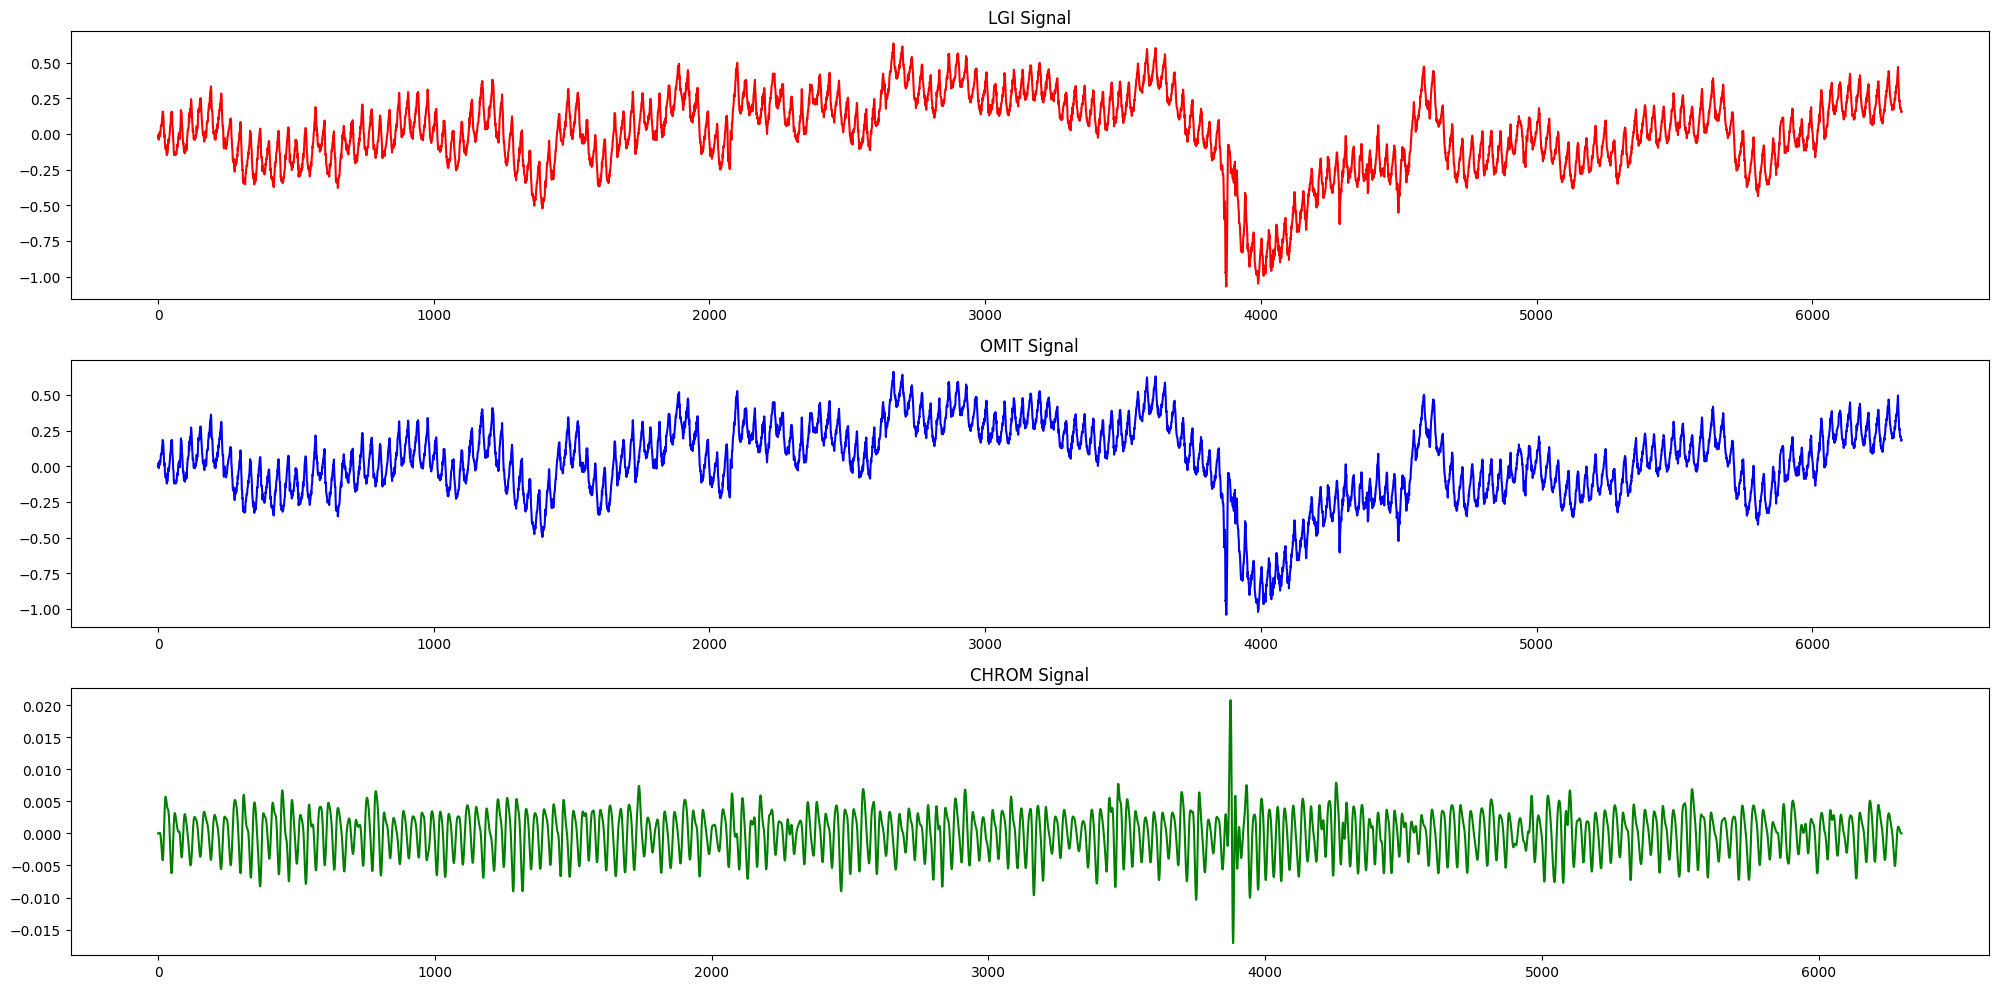

In [31]:
## Load the data .npy of the LGI, OMIT and GREEN for subject S51
# Load the data
lgi_path = os.path.join("s51", f"s51_T1_LGI_rppg.npy")
omit_path = os.path.join("s51", f"s51_T1_OMIT_rppg.npy")
chrom_path = os.path.join("s51", f"s51_T1_CHROM_rppg.npy")

lgi = np.load(lgi_path)
omit = np.load(omit_path)
chrom = np.load(chrom_path)

## Plot the path of the methods
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.plot(lgi, color='red')
plt.title('LGI Signal')
plt.subplot(3, 1, 2)
plt.plot(omit, color='blue')
plt.title('OMIT Signal')
plt.subplot(3, 1, 3)
plt.plot(chrom, color='green')
plt.title('CHROM Signal')
plt.tight_layout()
plt.show()
